## Overview  
The below Natural Language Processing Model is an assignment from an [Udemy Machine Learning class](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?utm_source=adwords&utm_medium=udemyads&utm_campaign=Python_v.PROF_la.EN_cc.US_ti.7380&utm_content=deal4584&utm_term=_._ag_78513466559_._ad_436603254913_._kw__._de_c_._dm__._pl__._ti_dsa-774930046209_._li_9030072_._pd__._&matchtype=b&gclid=Cj0KCQiA9P__BRC0ARIsAEZ6iriN81oGE4RLs6f0zCpoBHxAbJNchYTEvzNHU9QE-cNlYdKRtxqLnAAaAkiaEALw_wcB)

## Problem Statement

Provided with the datasets from the [RecSys2013: Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) Kaggle Competition, the NLP model classifies Yelp Reviews into 1 - 5 star ratings.

## Additional NLP Resources

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Text Pre-processing](#txt_preproc)
* [Vectorization](#vectorization)
* [Splitting the data into training and testing sets](#split_data)
* [Create Data Pipeline](#pipeline)
* [Export Prediction File](#export)
* [Evaluation Metrics](#eval_metrics)

<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [1]:
import nltk 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
#Can view list of available packages within NLTK, via .download_shell(), 'l' (List)
#Can specify package to download  via .download_shell(), 'd' (Download)

#nltk.download_shell()

<a class="anchor" id="import_data"></a>
## Import Data

Data for this project is provided as a .csv file and saved our current working director

Import text as a list

In [2]:
#import csv file
yelp = pd.read_csv('yelp.csv')

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [14]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [15]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  length       10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 625.1+ KB


In [16]:
yelp.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [18]:
yelp.groupby('stars').describe()

cool                                                useful            \
        count      mean       std  min  25%  50%  75%   max   count      mean   
stars                                                                           
1       749.0  0.576769  1.474759  0.0  0.0  0.0  1.0  17.0   749.0  1.604806   
2       927.0  0.719525  1.491182  0.0  0.0  0.0  1.0  14.0   927.0  1.563107   
3      1461.0  0.788501  1.602576  0.0  0.0  0.0  1.0  18.0  1461.0  1.306639   
4      3526.0  0.954623  2.034367  0.0  0.0  0.0  1.0  38.0  3526.0  1.395916   
5      3337.0  0.944261  2.484583  0.0  0.0  0.0  1.0  77.0  3337.0  1.381780   

       ... funny        length                                              \
       ...   75%   max   count        mean         std   min    25%    50%   
stars  ...                                                                   
1      ...   1.0  30.0   749.0  826.515354  742.929304  11.0  315.0  600.0   
2      ...   1.0  20.0   927.0  842.256742  704.079491   7.0  365.5  656.0   
3      ...   1.0  24.0  1461.0  758.498289  627.594294   1.0  342.0  599.0   
4      ...   1.0  57.0  3526.0  712.923142  600.158476   2.0  307.0  551.5   
5      ...   1.0  39.0  3337.0  624.999101  558.578229   6.0  243.0  471.0   

                        
           75%     max  
stars                   
1      1075.00  4618.0  
2      1105.00  4972.0  
3       975.00  4975.0  
4       945.75  4997.0  
5       826.00  4986.0  

[5 rows x 32 columns]

Let's make a new column to detect how long the text reviews are:

In [11]:
yelp['length']=yelp['text'].apply(len)

<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [19]:
yelp.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
length         0
dtype: int64

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

In [51]:
#sns.pairplot(df)

<AxesSubplot:xlabel='stars', ylabel='Count'>

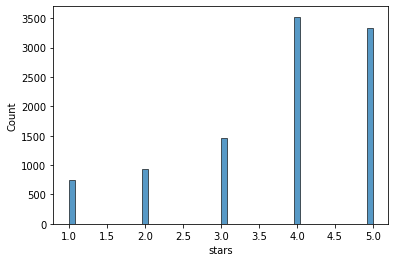

In [21]:
sns.histplot(yelp['stars'],bins=50)

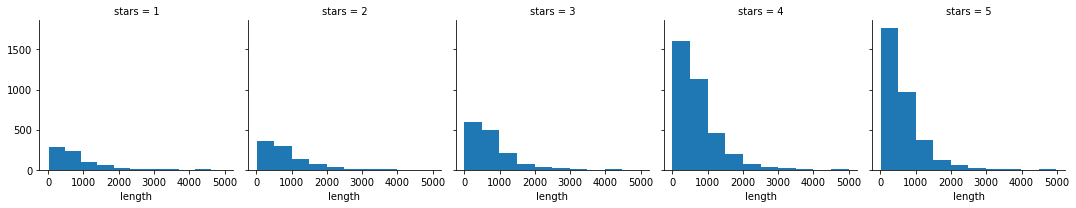

In [23]:
#using FacetGrid to create histograms of text length by star rating

#create the grid
g=sns.FacetGrid(yelp,col='stars')
#plot/map data to the grid
g=g.map(plt.hist, 'length')

<AxesSubplot:xlabel='stars', ylabel='length'>

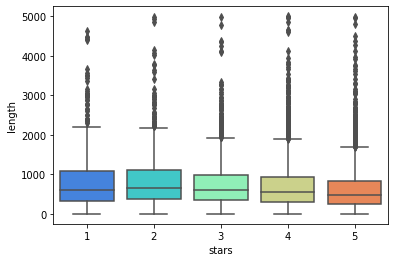

In [25]:
#box plot of text length by star rating
sns.boxplot(x='stars',y='length', data=yelp, palette='rainbow')

<AxesSubplot:xlabel='stars', ylabel='count'>

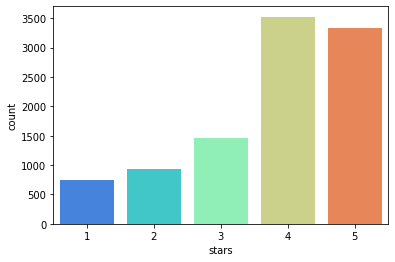

In [28]:
#count plot of star ratings
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [30]:
#group by stars and retrieve mean values of the numerical features
mean_data=yelp.groupby(by='stars').mean()
mean_data

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [31]:
#create a correlation matrix of the mean values of the numerical features
correlation_matrix = mean_data.corr().round(2)
correlation_matrix

,cool,useful,funny,length
cool,1.00,-0.74,-0.94,-0.86
useful,-0.74,1.00,0.89,0.70
funny,-0.94,0.89,1.00,0.84
length,-0.86,0.70,0.84,1.00


<AxesSubplot:>

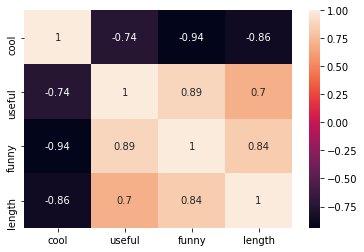

In [32]:
#plot the correlation matrix as a heat map
sns.heatmap(data=correlation_matrix,annot=True)

#sns.heatmap(data=df.corr().round(2),annot=True)

<a class="anchor" id="txt_preproc"></a>
## Text Pre-processing

Pre-processing is the step of transforming your text into a form that is predictable and analyzable for your task. A task is the combination of approach and domain. For example, extracting top keywords with TF-IDF (approach) from Tweets (domain) is an example of a Task.

**Appropriate Pre-Processing steps depend on the Task (approach & domain), and may not be directly transferrable/approppriate between tasks.**



[Notebook of examples Lowercasing, Stemming, Lemmatization, Stop Word Removal, Noise Removal](https://github.com/kavgan/nlp-in-practice/blob/master/text-pre-processing/Text%20Preprocessing%20Examples.ipynb) ()

[Notebook of examples Noise Removal, Tokenization, Normalization](https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html)


[NLTK book online](http://www.nltk.org/book/)


[Examples of pre-processing techiniques include](https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html):  

### Must Do:
  **Noise Removal**: Removing characters, digits and pieces of text that can interfere with your text analysis. Can include punctuation removal, special character removal, numbers removal, html formatting removal, domain specific keyword removal (e.g. ‘RT’ for retweet), source code removal, header removal and more. 
  
  **Lowercasing**: Lowercasing ALL your text data  
 
### Should Do:

  **Normalization**: Text normalization is the process of transforming a text into a standard form [a series of related tasks]. For example, the word “gooood” and “gud” can be transformed to “good”. Another example is mapping of near identical words such as “stopwords”, “stop-words” and “stop words” to just “stopwords”. This is especially important for noisy texts such as social media comments, text messages and comments to blog posts where abbreviations, misspellings and use of out-of-vocabulary words (oov) are prevalent.  

### Can Do:
  [**Stemming**](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html): Stemming is the process of reducing inflection in words (e.g. troubled, troubles) to their root form (e.g. trouble).   
  
  [**Lemmatization**](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html): Similar to stemming, lemmatization removes inflections and map words to its root form. However, instead of just trimming off the end of words like stemming, Lemmatization actually transforms words to the actual root. For example, the word “better” would map to “good”.  
  
  **Stop words**: remove commonly used words  
  
  **Tokenization**: is a step which splits longer strings of text into smaller pieces, or tokens. 
  
  **Text Enrichment / Augmentation**: involves augmenting your original text data with information that you did not previously have. Text enrichment provides more semantics to your original text, thereby improving its predictive power and the depth of analysis you can perform on your data. You can use [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) to get more granular information about the words in your text. For example, in a document classification problem, the appearance of the word **book** as a **noun** could result in a different classification than **book** as a **verb** as one is used in the context of reading and the other is used in the context of reserving something. You could also  use [embeddings](https://en.wikipedia.org/wiki/Word_embedding) to enrich the meaning of words, phrases and sentences for classification, search, summarization and text generation in general. Other text enrichment techniques include [phrase extraction](http://kavita-ganesan.com/how-to-incorporate-phrases-into-word2vec-a-text-mining-approach/#.YBF3L-hKiUl), where you recognize compound words as one (aka chunking), [expansion with synonyms](https://www.aclweb.org/anthology/R09-1073/) and [dependency parsing](http://www.cs.virginia.edu/~kc2wc/teaching/NLP16/slides/15-DP.pdf).
  

We need to convert our string data (sequence of characters) into a format consumable by algorithims (feature vectors (sequences of numbers)). To do this we'll use the Bag of Words approach;  and take following pre-processing steps:

1) Noise Removal (punctuation); use **string** library  
2) Remove Stop Words; use **NLTK** library  
3) Write a function that will split a message into its individual words and return a list. 

Example of **NOISE REMOVAL** (punctuation):

In [38]:
#this yields a string (nopunc) with punctuation removed 

import string

mess = 'Sample message! Notice: it has punctuation.'

#Check individual characters to see if they are in string.punctuation, if they are NOT, then keep/append to new variable (nopunc)
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters back together to form the string.
nopunc = ''.join(nopunc)

In [31]:
#nopunc

'Sample message Notice it has punctuation'

Example of **STOP WORD REMOVAL**:

In [37]:
#import 'english' stopwords from nltk.corpus
from nltk.corpus import stopwords

In [66]:
# of stopwords
#len(stopwords.words('english'))

In [67]:
#example of stopwords
#stopwords.words('english')[0:10]

In [70]:
#Use a split string that has had punctuation removed; ex/nopunc.split()
#compare lower case items in the split string (word.lower()) with words contained in stopwords.words('english'); if the split string word is NOT in stopwords.words('english'), then append to new variable (clean_mess)
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [71]:
#String before removing stop words:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [72]:
#String after removing stop words:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Lower case the 'message' feature:

In [33]:
yelp['text']=yelp['text'].apply(lambda x: x.lower())

Create Function of Pre-processing Steps; to apply to our DataFrame

In [39]:
def punc_and_stop_removal(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
      
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
#check to make sure the funtion is working; only use a few rows of data to test (.head())
yelp['text'].head(10).apply(punc_and_stop_removal)

0    [wife, took, birthday, breakfast, excellent, w...
1    [idea, people, give, bad, reviews, place, goes...
2    [love, gyro, plate, rice, good, also, dig, can...
3    [rosie, dakota, love, chaparral, dog, park, co...
4    [general, manager, scott, petello, good, egg, ...
5    [quiessence, simply, put, beautiful, full, win...
6    [drop, youre, drive, ate, go, back, next, day,...
7    [luckily, didnt, travel, far, make, connecting...
8    [definitely, come, happy, hour, prices, amazin...
9    [nobuo, shows, unique, talents, everything, me...
Name: text, dtype: object

In [41]:
yelp['text'].head(10)

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    love the gyro plate. rice is so good and i als...
3    rosie, dakota, and i love chaparral dog park!!...
4    general manager scott petello is a good egg!!!...
5    quiessence is, simply put, beautiful.  full wi...
6    drop what you're doing and drive here. after i...
7    luckily, i didn't have to travel far to make m...
8    definitely come for happy hour! prices are ama...
9    nobuo shows his unique talents with everything...
Name: text, dtype: object

<a class="anchor" id="vectorization"></a>
## Vectorization

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as **term frequency**)

2. Weigh the counts, so that frequent tokens get lower weight (**inverse document frequency**)

3. *Normalize* the vectors to unit length, to abstract from the original text length (**L2 norm**)


Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function: punc_and_stop_removal

In [43]:
#bag of words_transformer is fit to yelp['text'] data 
bow_transformer = CountVectorizer(analyzer=punc_and_stop_removal).fit(yelp['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

36283


We can compare a message from the document with its BOW vector with  `bow_transformer`:

In [44]:
message4 = yelp['text'][3]
print('Text format:')
print(message4)

Text format:
rosie, dakota, and i love chaparral dog park!!! it's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

the scottsdale park and rec dept. does a wonderful job of keeping the park clean and shaded.  you can find trash cans and poopy-pick up mitts located all over the park and paths.

the fenced in area is huge to let the dogs run, play, and sniff!


In [45]:
#use bow_transformer on 1 message (message4), defined above
bow4 = bow_transformer.transform([message4])
print('Vector representation:')
print(bow4)
print('\n')
print('Vector shape:')
print(bow4.shape)

Vector representation:
  (0, 2561)	1
  (0, 3334)	1
  (0, 3544)	1
  (0, 5679)	1
  (0, 6229)	1
  (0, 6937)	1
  (0, 7843)	1
  (0, 8796)	1
  (0, 9394)	1
  (0, 9430)	1
  (0, 10123)	1
  (0, 10137)	1
  (0, 10597)	1
  (0, 12263)	1
  (0, 12332)	1
  (0, 12423)	1
  (0, 16108)	1
  (0, 17529)	1
  (0, 17829)	1
  (0, 18253)	1
  (0, 18623)	1
  (0, 18965)	1
  (0, 19132)	1
  (0, 19176)	1
  (0, 20693)	1
  (0, 23359)	4
  (0, 23505)	2
  (0, 24390)	1
  (0, 24602)	1
  (0, 26051)	1
  (0, 27281)	1
  (0, 27400)	1
  (0, 28057)	1
  (0, 28566)	1
  (0, 29569)	1
  (0, 31331)	1
  (0, 33143)	1
  (0, 35640)	1
  (0, 35875)	1


Vector shape:
(1, 36283)


In [46]:
#We can retrieve the word at a given vector position using .get_feature_names
print(bow_transformer.get_feature_names()[23359])
print(bow_transformer.get_feature_names()[23505])

park
paths


### Transform Entire 'text' feature

In [47]:
messages_bow = bow_transformer.transform(yelp['text'])

In [48]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (10000, 36283)
Amount of Non-Zero occurences:  575483


In [49]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
#rounding sparsity may yield zero
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### TF-IDF: a measure of how important a word is to a document in a collection or corpus
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer

#an instance of TfidfTransformer fit to the 'messages' vectors/bag of words: messages_bow
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
#print(tfidf4)

  (0, 35875)	0.19868683869573364
  (0, 35640)	0.08735885731133755
  (0, 33143)	0.1401627603787869
  (0, 31331)	0.14959858352881644
  (0, 29569)	0.19022218609404493
  (0, 28566)	0.16128134769413638
  (0, 28057)	0.08228108357896975
  (0, 27400)	0.09731251471140746
  (0, 27281)	0.19022218609404493
  (0, 26051)	0.17575176689409064
  (0, 24602)	0.19868683869573364
  (0, 24390)	0.10883344549251575
  (0, 23505)	0.33017513162112455
  (0, 23359)	0.4131648872351035
  (0, 20693)	0.19022218609404493
  (0, 19176)	0.05749331496275254
  (0, 19132)	0.0723901709743486
  (0, 18965)	0.1020319616181375
  (0, 18623)	0.08642209653182101
  (0, 18253)	0.1468109284941821
  (0, 17829)	0.13107488531691633
  (0, 17529)	0.09429261677550092
  (0, 16108)	0.07862698311529571
  (0, 12423)	0.07094000301503434
  (0, 12332)	0.1528166950924477
  (0, 12263)	0.17575176689409064
  (0, 10597)	0.16128134769413638
  (0, 10137)	0.1150281400953042
  (0, 10123)	0.10498026132249165
  (0, 9430)	0.10606343000436337
  (0, 9394)	0.1612

Example of how to check the IDF (inverse document frequency) of a specific word ("u" and "university"):

In [51]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

7.1193979136182
7.1659179292530935


Transform the entire bag-of-words corpus into TF-IDF corpus:

In [52]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(10000, 36283)


<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Split data into train and test sets

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(yelp['text'], yelp['stars'], test_size=0.2)

<a class="anchor" id="pipeline"></a>
## Create Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. 

This will **allow us to set up all the transformations** that we will do to the data for future use.

In [58]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=punc_and_stop_removal)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [59]:
#fit pipeline 'model' to training data
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function punc_and_stop_removal at 0x1595AC00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
#create predictions of test data
predictions = pipeline.predict(X_test)

<a class="anchor" id="export"></a>
## Export Prediction File

Convert 'predictions' array into pd DataFrame

In [65]:
final_dataset = pd.DataFrame(
    {
        "label": predictions,
    },
    index = X_test.index
)

In [66]:
final_dataset.head()

,label
4199,4
5291,4
3131,4
5984,4
1202,4


In [67]:
export_pred = pd.DataFrame(data=final_dataset,
                             columns=['label'],
                             index=X_test.index)

In [68]:
export_pred.to_csv('yelp_submission.csv')

<a class="anchor" id="eval_metrics"></a>
## Evaluation Metrics

In [63]:
#create evaluation metric using the predictions from the test data (predictions), and the actual test labels (y_test)
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.91      0.37      0.52      1692
           5       0.30      0.68      0.41       308

    accuracy                           0.41      2000
   macro avg       0.24      0.21      0.19      2000
weighted avg       0.82      0.41      0.51      2000



C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta